In [428]:
%matplotlib inline
__author__           = "Anzal KS"
__copyright__        = "Copyright 2022-, Anzal KS"
__maintainer__       = "Anzal KS"
__email__            = "anzalks@ncbs.res.in"
from pathlib import Path
import neo.io as nio
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as spy
from pathlib import Path
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties


In [459]:
"""
Font and color defining functions
"""
y_labels = FontProperties()
y_labels.set_family('sans-serif')
y_labels.set_size('large')
x_labels = FontProperties()
x_labels.set_family('sans-serif')
x_labels.set_size('large')

In [460]:
f = '/Users/anzalks/Documents/Expt_data/Recordings/CA1_recordings/x_spread_recording_02Hz_30mins/cells_cumulated/2022_12_12_cell_5'
f=Path(f)
#f_plt = '/Users/anzalks/Documents/Expt_data/Recordings/CA1_recordings/x_spread_recording_02Hz_30mins/2022_12_12/data/2022_12_12_cell_3/aaaaa.png'
#file_name = f.split('/')[-1]

In [461]:
outdir = f/'plots'
outdir.mkdir(exist_ok=True, parents=True)

In [462]:
def list_files(p):
    f_list = []
    f_list=list(p.glob('**/*abf'))
    f_list.sort()
    return f_list

In [463]:
def protocol_file_name(file_name):
    f = str(file_name)
    reader = nio.AxonIO(f)
    protocol_name = reader._axon_info['sProtocolPath']
    protocol_name = str(protocol_name).split('\\')[-1]
    protocol_name = protocol_name.split('.')[-2]
    return protocol_name

In [489]:
def animate_optical(f, outdir):
    global t
    global trace
    f_n = f.stem
    outdir = f"{outdir}/{f_n}"
    f = str(f)
    file_name = f.split("/")[-1]
    reader = nio.AxonIO(f)
    channels = reader.header["signal_channels"]
    chan_count = len(channels)
    block = reader.read_block(signal_group_mode="split-all")
    segments = block.segments
    sample_trace = segments[0].analogsignals[0]
    sampling_rate = sample_trace.sampling_rate
    ti = sample_trace.t_start
    tf = sample_trace.t_stop
    total_time = int(tf - ti)
    protocol_raw = reader.read_raw_protocol()
    protocol_raw = protocol_raw[0]
    print(total_time)
    unit = str(sample_trace.units).split()[1]
    all_chan_trace = []
    t_all = []
    print("total channel loop begin")
    for i in range(chan_count):
        trace_all = list()
        tr = list()
        for s, segment in enumerate(segments):
            analogsignals = segment.analogsignals[i]
            unit = str(analogsignals.units).split()[1]
            trace = np.array(analogsignals)
            trace = np.mean(trace, axis=1)
            trace_all.append(trace)
            t = np.linspace(0, float(tf - ti), len(trace))
            tr.append(t)
        trace_all = np.mean(trace_all, axis=0)
        tr = np.mean(tr, axis=0)
        all_chan_trace.append(trace_all)
        t_all.append(tr)
    t_all = np.mean(t_all, axis=0)
    data = [
        t_all,
        all_chan_trace[0],
        all_chan_trace[1],
        all_chan_trace[2],
        all_chan_trace[3],
    ]
    print(f" shape of data = {np.shape(data)}")
    #data = [t_all, all_chan_trace[0]] #for cell data
    data = [t_all, all_chan_trace[3]] # for feild
    print(f"shape of t, data ={np.shape(data[0])}, {np.shape(data[1])}")
    fontproperties=f'fontproperties={y_labels}'
    fig = plt.figure(figsize=(18,6))
    #axis = plt.axes(xlim=(0, 12.5), ylim=(-75, -50), xlabel=('time (s)'),ylabel=('membrane voltage (mV)'),title=('cell response to patterns'))
    axis = plt.axes(xlim=(0, 12.5), ylim=(-2, 0.1), xlabel=('time (s)'),ylabel=('voltage (mV)'),title=('field response to patterns'))
    (line,) = axis.plot([], [], lw=3)
    num_of_frames = 100 #100
    num_of_sec_per_frame = 0.05 #1
    frames = np.linspace(0, t_all[-1]*int(sampling_rate), num_of_frames)

    def init():
        line.set_data([],[])
        return (line,)

    def animate(i):
        # print("animating")
        x = data[0][: int(i + num_of_sec_per_frame*int(sampling_rate))]
        y = data[1][: int(i + num_of_sec_per_frame*int(sampling_rate))]

        line.set_data(x, y)
        # axis.set_xlim(min(x), max(x))
        # axis.set_xlim(data[0][int(i)], data[0][int(i + num_of_sec_per_frame*int(sampling_rate))])

        return (line,)

    # anim = FuncAnimation(
    #     fig, animate, init_func=init, frames=len(data[0])-25000, blit=True
    # )
    anim = FuncAnimation(
        fig, animate, init_func=init, frames=frames, blit=True
    )
    #anim.save(f"{outdir}plot_anim.mp4", fps=num_of_frames/t_all[-1])
    anim.save(f"{outdir}plot_anim_field.mp4", fps=num_of_frames/t_all[-1])


In [490]:
abfs = list_files(f)

17
total channel loop begin
 shape of data = (5, 342000)
shape of t, data =(342000,), (342000,)


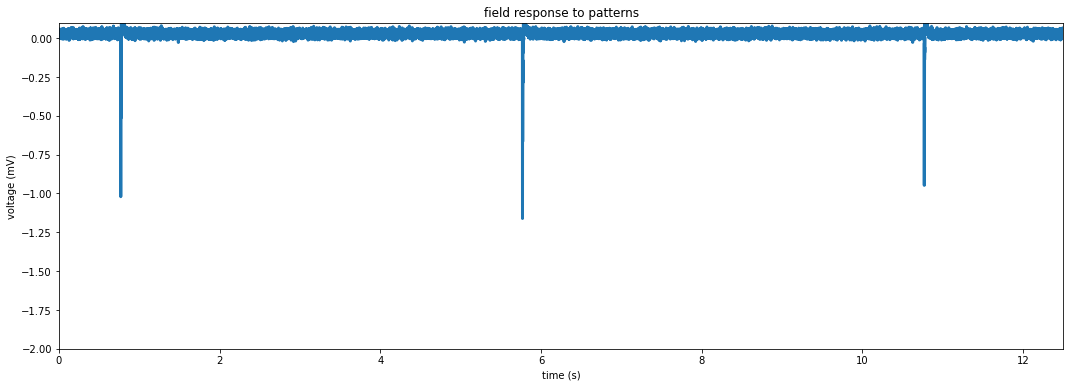

In [491]:
animate_optical(abfs[4],outdir)